# <a id='toc1_'></a>[__Vehicles Project__](#toc0_)
__Info:__
1. data link: [vehicles](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data)
2. project date: 6 Aug 2024

**Table of contents**<a id='toc0_'></a>    
- [__Vehicles Project__](#toc1_)    
    - [Importing Libraries](#toc1_1_1_)    
    - [Loading data](#toc1_1_2_)    
    - [Data Information](#toc1_1_3_)    
  - [Data Cleaning](#toc1_2_)    
      - [Droping `Null value columns , the columns with unwanted data`](#toc1_2_1_1_)    
      - [handling `missing values`](#toc1_2_1_2_)    
    - [resetting index to start from 0 again](#toc1_2_2_)    
  - [EDA](#toc1_3_)    
    - [What is the highest paid car with cylinder's model?](#toc1_3_1_)    
    - [What is __the TOP 3 Manufacturers in The Market__?](#toc1_3_2_)    
    - [Average Car price During time](#toc1_3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Importing Libraries](#toc0_)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings("ignore")

### <a id='toc1_1_2_'></a>[Loading data](#toc0_)

In [2]:
vehicles = 'vehicles.csv'
vehicles_df = pd.read_csv(filepath_or_buffer=vehicles)

### <a id='toc1_1_3_'></a>[Data Information](#toc0_)

In [3]:
vehicles_df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [4]:
vehicles_df.shape

(426880, 26)

In [5]:
vehicles_df.duplicated().sum()

0

In [6]:
vehicles_df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [7]:
for col in vehicles_df.columns:
    print(col, 'unique values:', vehicles_df[col].nunique())
    print(col, vehicles_df[col].isnull().sum())
    print(vehicles_df[col].value_counts().nlargest(2))
    print('\n' + '-' * 20 + '\n')

id unique values: 426880
id 0
id
7222695916    1
7313139418    1
Name: count, dtype: int64

--------------------

url unique values: 426880
url 0
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html    1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html     1
Name: count, dtype: int64

--------------------

region unique values: 404
region 0
region
columbus        3608
jacksonville    3562
Name: count, dtype: int64

--------------------

region_url unique values: 413
region_url 0
region_url
https://spokane.craigslist.org    2988
https://eugene.craigslist.org     2985
Name: count, dtype: int64

--------------------

price unique values: 15655
price 0
price
0       32895
6995     3169
Name: count, dtype: int64

--------------------

year unique values: 114
year 1205
year
2017.0    36420
2018.0    36369
Name: count, dtype: int64

--------------------

manufacturer unique values: 42
manufacturer 17646
manufacturer
ford         709

## <a id='toc1_2_'></a>[Data Cleaning](#toc0_)
#### <a id='toc1_2_1_1_'></a>[Droping `Null value columns , the columns with unwanted data`](#toc0_)

In [8]:
# drop columns that has null values

vehicles_df = vehicles_df.drop(columns="county")
vehicles_df = vehicles_df.drop(columns="url")
vehicles_df = vehicles_df.drop(columns="region_url")
vehicles_df = vehicles_df.drop(columns="description")
vehicles_df = vehicles_df.drop(columns="posting_date")
vehicles_df = vehicles_df.drop(columns="VIN")
vehicles_df = vehicles_df.drop(columns="image_url")

vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,wy,33.786500,-84.445400
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,wy,33.786500,-84.445400
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,wy,33.779214,-84.411811
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,wy,33.786500,-84.445400


#### <a id='toc1_2_1_2_'></a>[handling `missing values`](#toc0_)

In [9]:
# list of column names
column_names = vehicles_df.columns.to_numpy()
column_names

# null values to 0 and "" values
for column in column_names:
    if column == 'id' or column == 'year' or column == 'lat' or column == 'long' or column == 'price':
        vehicles_df[column] = vehicles_df[column].fillna(0)
    else:
        vehicles_df[column] = vehicles_df[column].fillna("")

vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7222695916,prescott,6000,0.0,,,,,,,,,,,,,az,0.000000,0.000000
1,7218891961,fayetteville,11900,0.0,,,,,,,,,,,,,ar,0.000000,0.000000
2,7221797935,florida keys,21000,0.0,,,,,,,,,,,,,fl,0.000000,0.000000
3,7222270760,worcester / central MA,1500,0.0,,,,,,,,,,,,,ma,0.000000,0.000000
4,7210384030,greensboro,4900,0.0,,,,,,,,,,,,,nc,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,,sedan,,wy,33.786500,-84.445400
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,,gas,12029.0,clean,other,fwd,,sedan,red,wy,33.786500,-84.445400
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,,diesel,4174.0,clean,other,,,hatchback,white,wy,33.779214,-84.411811
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,,sedan,silver,wy,33.786500,-84.445400


In [10]:
"""
this code dropping rows that has no data in columns 
(year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, size, type, paint_color)
"""

num_of_rows_deleted = 0
for i in vehicles_df.index:
    if vehicles_df.loc[i,'year'] == "" and vehicles_df.loc[i,'manufacturer'] == "" and vehicles_df.loc[i,'model'] == "" and vehicles_df.loc[i,'condition'] == "" and vehicles_df.loc[i,'cylinders'] == "" and vehicles_df.loc[i,'fuel'] == "" and vehicles_df.loc[i,'odometer'] == "" and vehicles_df.loc[i,'title_status'] == "" and vehicles_df.loc[i,'transmission'] == "" and vehicles_df.loc[i,'drive'] == "" and vehicles_df.loc[i,'size'] == "" and vehicles_df.loc[i,'type'] == "" and vehicles_df.loc[i,'paint_color'] == "":
        vehicles_df.drop(i,inplace=True)
        num_of_rows_deleted += 1
print("Number of rows deleted:",num_of_rows_deleted)

vehicles_df

Number of rows deleted: 0


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7222695916,prescott,6000,0.0,,,,,,,,,,,,,az,0.000000,0.000000
1,7218891961,fayetteville,11900,0.0,,,,,,,,,,,,,ar,0.000000,0.000000
2,7221797935,florida keys,21000,0.0,,,,,,,,,,,,,fl,0.000000,0.000000
3,7222270760,worcester / central MA,1500,0.0,,,,,,,,,,,,,ma,0.000000,0.000000
4,7210384030,greensboro,4900,0.0,,,,,,,,,,,,,nc,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,,sedan,,wy,33.786500,-84.445400
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,,gas,12029.0,clean,other,fwd,,sedan,red,wy,33.786500,-84.445400
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,,diesel,4174.0,clean,other,,,hatchback,white,wy,33.779214,-84.411811
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,,sedan,silver,wy,33.786500,-84.445400


In [11]:
'''
replacing the (manufacturer, model, condition, cylinders, fuel, title_status, transmission, drive, size, type, paint_color) 
from ""  "other" to make it easier to deal with them easier 
'''

column_names = vehicles_df.columns.tolist()
for column in column_names:
    vehicles_df[column].replace("","other",inplace=True)

vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7222695916,prescott,6000,0.0,other,other,other,other,other,other,other,other,other,other,other,other,az,0.000000,0.000000
1,7218891961,fayetteville,11900,0.0,other,other,other,other,other,other,other,other,other,other,other,other,ar,0.000000,0.000000
2,7221797935,florida keys,21000,0.0,other,other,other,other,other,other,other,other,other,other,other,other,fl,0.000000,0.000000
3,7222270760,worcester / central MA,1500,0.0,other,other,other,other,other,other,other,other,other,other,other,other,ma,0.000000,0.000000
4,7210384030,greensboro,4900,0.0,other,other,other,other,other,other,other,other,other,other,other,other,nc,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,other,sedan,other,wy,33.786500,-84.445400
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,other,gas,12029.0,clean,other,fwd,other,sedan,red,wy,33.786500,-84.445400
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,other,diesel,4174.0,clean,other,other,other,hatchback,white,wy,33.779214,-84.411811
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,other,sedan,silver,wy,33.786500,-84.445400


### <a id='toc1_2_2_'></a>[resetting index to start from 0 again](#toc0_)

In [12]:
vehicles_df.reset_index(drop=True)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7222695916,prescott,6000,0.0,other,other,other,other,other,other,other,other,other,other,other,other,az,0.000000,0.000000
1,7218891961,fayetteville,11900,0.0,other,other,other,other,other,other,other,other,other,other,other,other,ar,0.000000,0.000000
2,7221797935,florida keys,21000,0.0,other,other,other,other,other,other,other,other,other,other,other,other,fl,0.000000,0.000000
3,7222270760,worcester / central MA,1500,0.0,other,other,other,other,other,other,other,other,other,other,other,other,ma,0.000000,0.000000
4,7210384030,greensboro,4900,0.0,other,other,other,other,other,other,other,other,other,other,other,other,nc,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,other,sedan,other,wy,33.786500,-84.445400
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,other,gas,12029.0,clean,other,fwd,other,sedan,red,wy,33.786500,-84.445400
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,other,diesel,4174.0,clean,other,other,other,hatchback,white,wy,33.779214,-84.411811
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,other,sedan,silver,wy,33.786500,-84.445400


In [13]:
vehicles_df.describe()

,id,price,year,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2005.557862,37.903383,-93.295009
std,4.473170e+06,1.218228e+07,107.122966,7.482256,21.627036
min,7.207408e+09,0.000000e+00,0.000000,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,34.210000,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,39.064410,-88.053300
75%,7.315254e+09,2.648575e+04,2017.000000,42.350000,-80.392300
max,7.317101e+09,3.736929e+09,2022.000000,82.390818,173.885502


In [14]:
# convering data types
for column in column_names:
    if column == 'id' or column == 'price' or column == 'lat' or column == 'long':
        vehicles_df[column] = vehicles_df[column].astype(float)
    elif column == 'year':
        vehicles_df[column] = vehicles_df[column].astype(int)
        vehicles_df[column] = vehicles_df[column].astype(str)
        vehicles_df[column] = vehicles_df[column].replace("0","unknown year")

    else:
        vehicles_df[column] = vehicles_df[column].astype(str)

vehicles_df['year'].replace(0,"unknown year",inplace=True)

vehicles_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,7.222696e+09,prescott,6000.0,unknown year,other,other,other,other,other,other,other,other,other,other,other,other,az,0.000000,0.000000
1,7.218892e+09,fayetteville,11900.0,unknown year,other,other,other,other,other,other,other,other,other,other,other,other,ar,0.000000,0.000000
2,7.221798e+09,florida keys,21000.0,unknown year,other,other,other,other,other,other,other,other,other,other,other,other,fl,0.000000,0.000000
3,7.222271e+09,worcester / central MA,1500.0,unknown year,other,other,other,other,other,other,other,other,other,other,other,other,ma,0.000000,0.000000
4,7.210384e+09,greensboro,4900.0,unknown year,other,other,other,other,other,other,other,other,other,other,other,other,nc,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7.301591e+09,wyoming,23590.0,2019,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,other,sedan,other,wy,33.786500,-84.445400
426876,7.301591e+09,wyoming,30590.0,2020,volvo,s60 t5 momentum sedan 4d,good,other,gas,12029.0,clean,other,fwd,other,sedan,red,wy,33.786500,-84.445400
426877,7.301591e+09,wyoming,34990.0,2020,cadillac,xt4 sport suv 4d,good,other,diesel,4174.0,clean,other,other,other,hatchback,white,wy,33.779214,-84.411811
426878,7.301591e+09,wyoming,28990.0,2018,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,other,sedan,silver,wy,33.786500,-84.445400


In [15]:
# deleting yars with 0 prices

zero_price_indices = vehicles_df[vehicles_df['price'] == 0].index
vehicles_df.drop(zero_price_indices, inplace=True)
vehicles_df.shape


(393985, 19)

## <a id='toc1_3_'></a>[EDA](#toc0_)

### <a id='toc1_3_1_'></a>[What is the highest paid car with cylinder's model?](#toc0_)

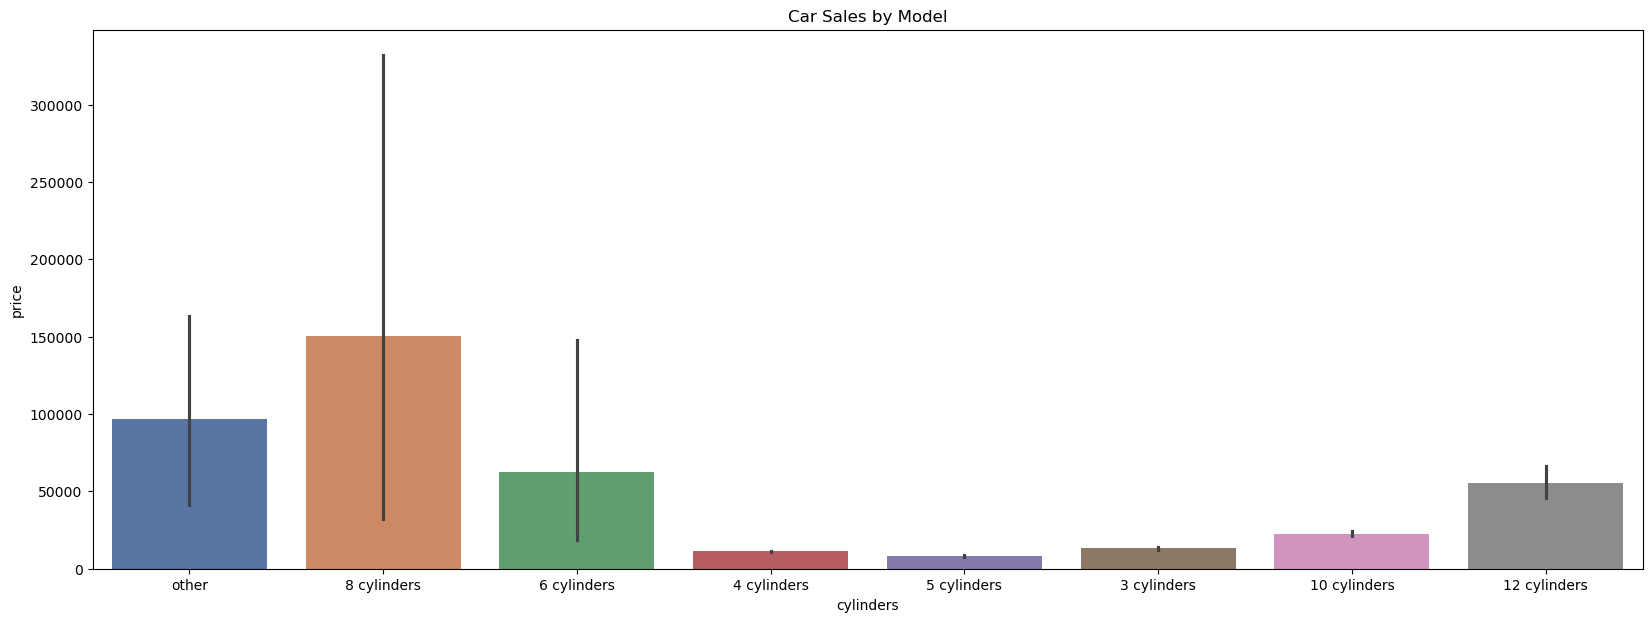

In [19]:
palette = sns.color_palette("deep")
sns.barplot(x='cylinders', y='price', data=vehicles_df, palette=palette, hue= 'cylinders')
plt.rcParams['figure.figsize'] = (20, 7)
plt.title('Car Sales by Model')
plt.show()

### <a id='toc1_3_2_'></a>[What is __the TOP 3 Manufacturers in The Market__?](#toc0_)

In [21]:
# Copy of vehicles_df to work on it
car_count = vehicles_df.copy()
other_manufacturers = car_count['manufacturer'].value_counts().index[3:]
# Replacing Manufactures names to Other Manufacturers
car_count['manufacturer'] = car_count['manufacturer'].replace(other_manufacturers,"Other Manufacturers")
car_count_Pie = car_count.value_counts('manufacturer').sort_values(ascending=False)

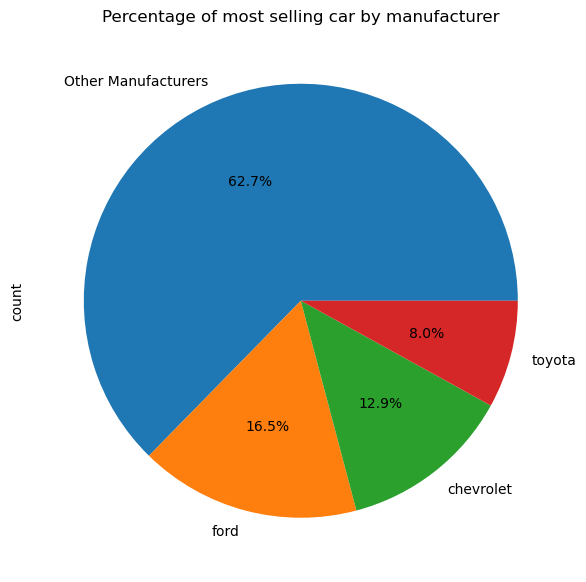

In [24]:

# Pie Chart for [Ford, Chevrolet, Toyota, Other Manufacturers]
car_count_Pie.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of most selling car by manufacturer')
plt.show()


### <a id='toc1_3_3_'></a>[Average Car price During time](#toc0_)

In [25]:
price_by_time = vehicles_df.copy()
price_by_time

num_of_rows_deleted = 0
for i in price_by_time.index:
    if price_by_time.loc[i,'year'] == "unknown year":
        price_by_time.drop(i,inplace=True)
        num_of_rows_deleted += 1
print("Number of rows deleted:",num_of_rows_deleted)

price_by_time['year'] = price_by_time['year'].astype(int)

# grouping all average prices with its year
price_by_time = price_by_time[['year','price']]
price_by_time = price_by_time.groupby('year').mean()

Number of rows deleted: 1173


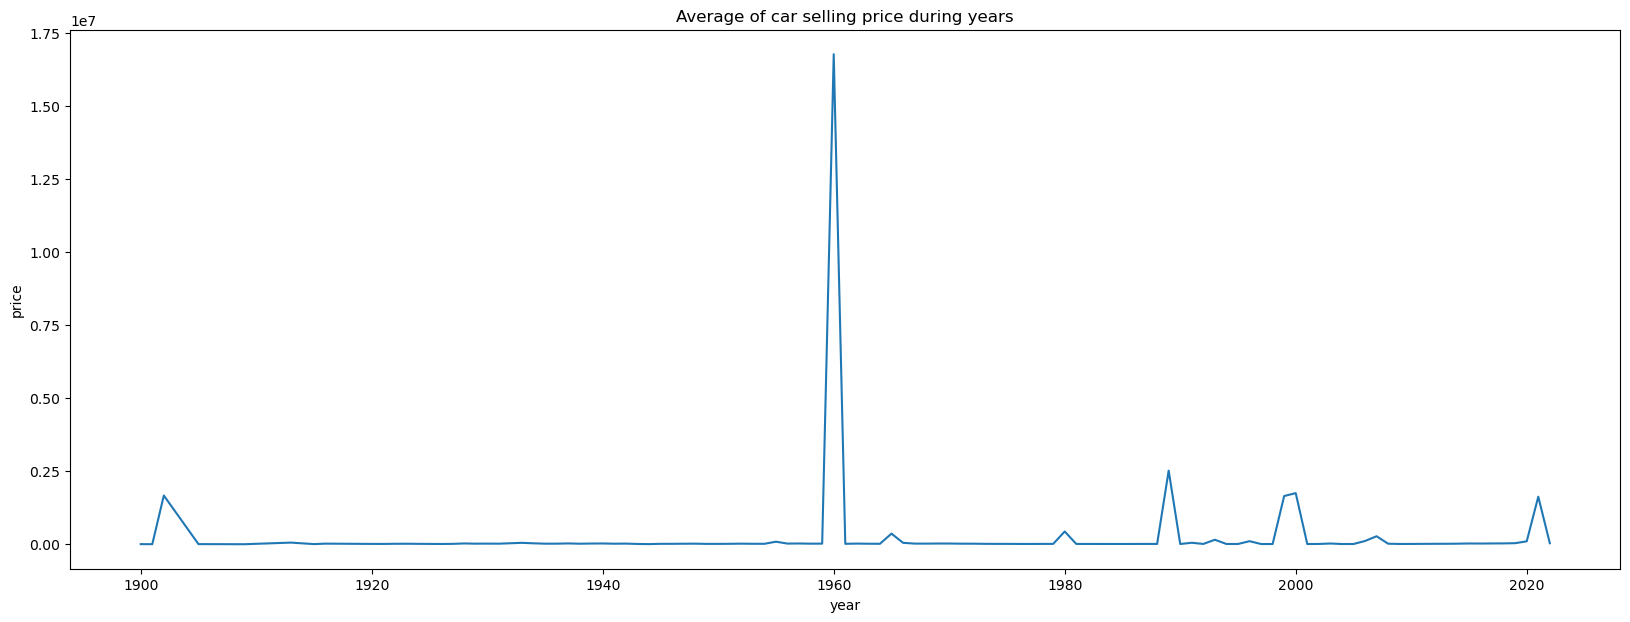

In [27]:

# line plot
sns.lineplot(x = 'year' ,y = 'price',data =price_by_time)
plt.title("Average of car selling price during years")
plt.rcParams['figure.figsize'] = (30, 7)
plt.show()


### THANKS :)